# Plot enrichment scores of clusters

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

WT_01_positive_nonshrunk


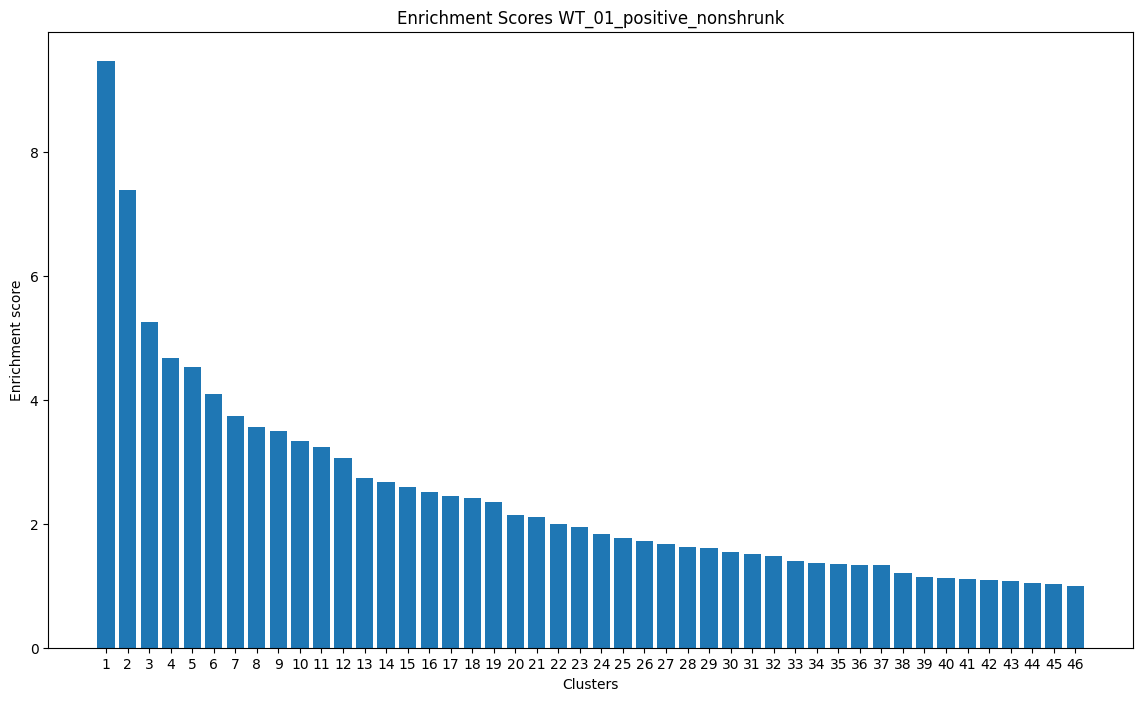

WT_01_negative_nonshrunk


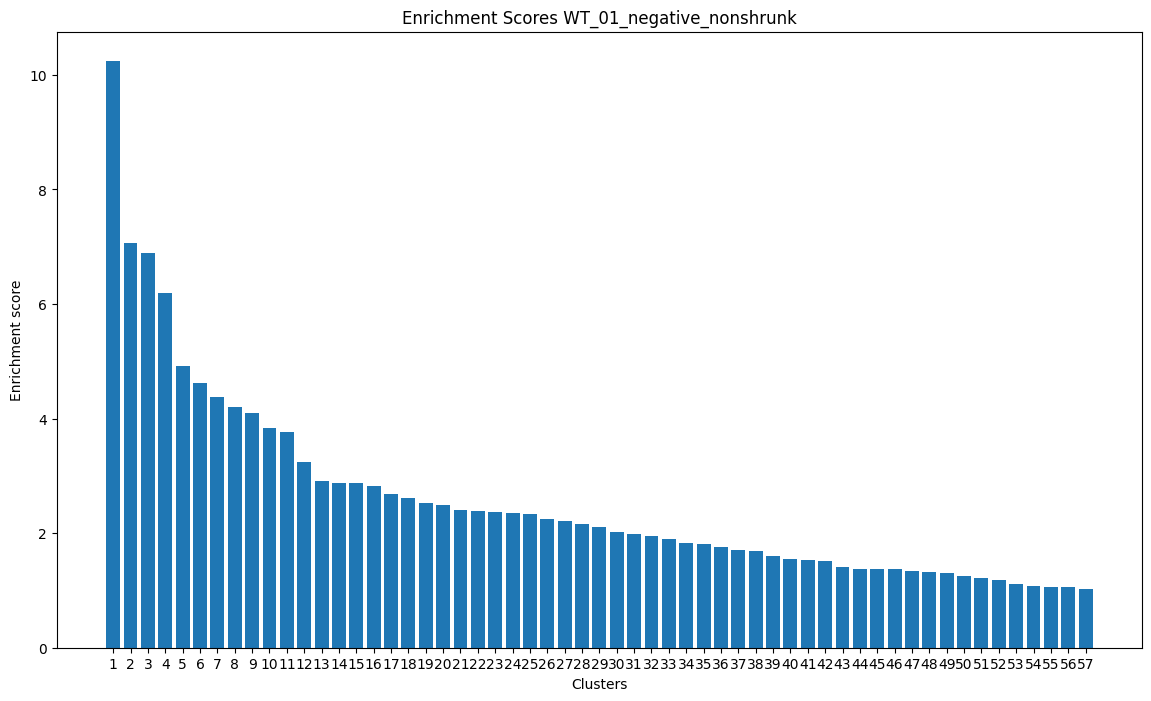

WT_02_positive_nonshrunk


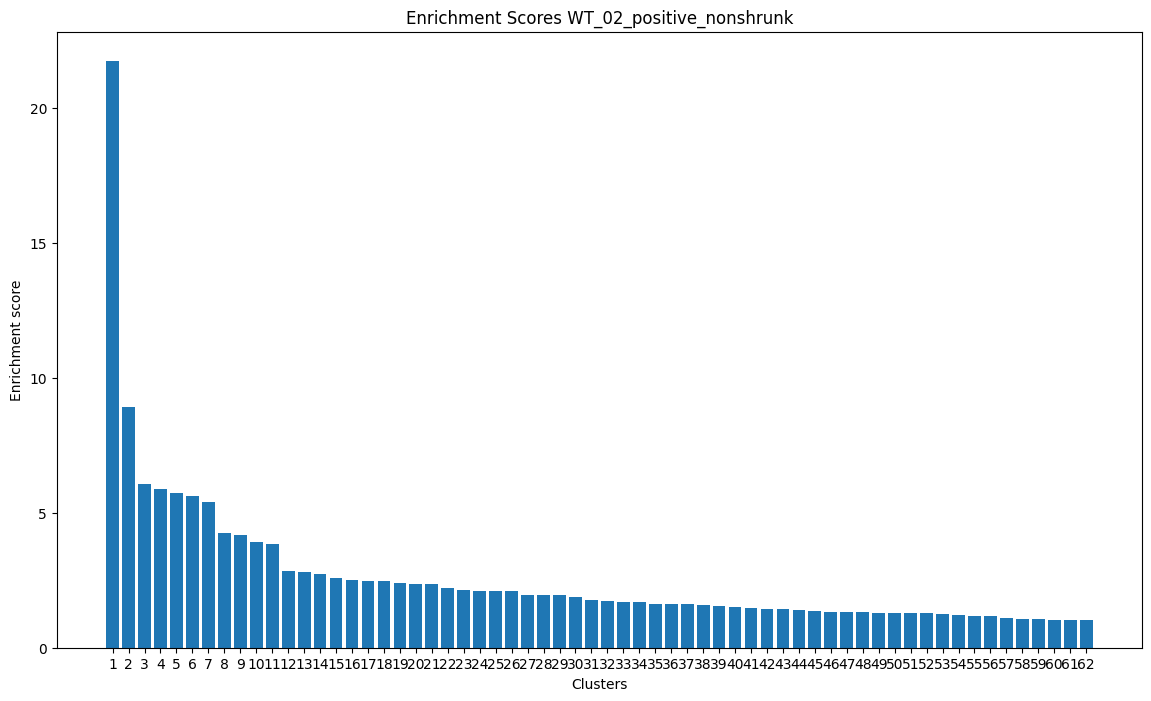

WT_02_negative_nonshrunk


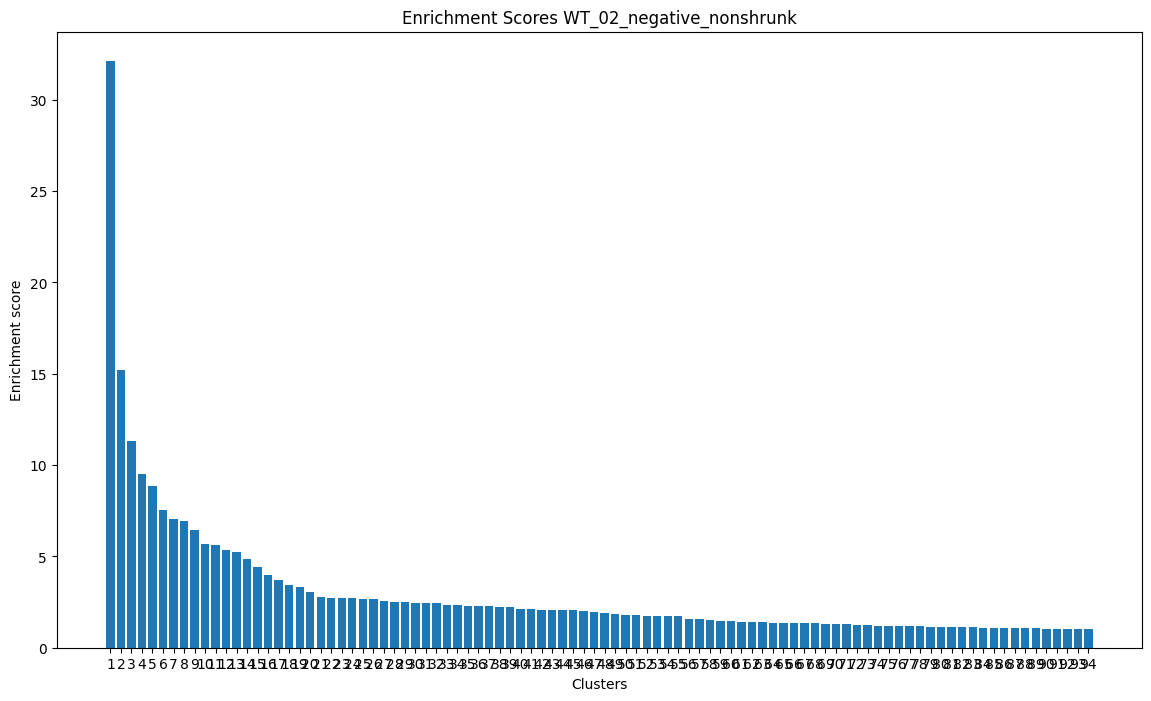

In [3]:

#grab just enrichment score for barplot
#files=['WT_01_positive','WT_01_negative','WT_02_positive','WT_02_negative']
nonshrunk_files=['WT_01_positive_nonshrunk','WT_01_negative_nonshrunk','WT_02_positive_nonshrunk','WT_02_negative_nonshrunk']
for i in nonshrunk_files:
    print(i)
    
    score = []
    cluster_id = []

    with open(f'../data/{i}.txt', 'r') as f:
        for line in f:
            if 'Enrichment Score: 'in line:
                #print(line)
                cluster_id.append(line.strip('\t').strip('\n').split()[2])
                score.append(float(line.strip('\t').strip('\n').split()[5]))
        
        df_i = pd.DataFrame({'Enrichment score': score})
        df_i.index = cluster_id
        #df_i = df_i.sort_values('Enrichment score', ascending=False)
        #print(df_i.to_string())

        #plot barplot
        
        plt.figure(figsize=(14, 8))
        df_i=df_i.loc[df_i['Enrichment score']>1]
        #print(df_i)
        plt.bar(df_i.index, df_i['Enrichment score'])
        #plt.bar(df_i.index, df_i['Enrichment score'])
        plt.xlabel('Clusters')
        plt.ylabel('Enrichment score')
        plt.title(f'Enrichment Scores {i}')
        plt.xticks(df_i.index)
        plt.savefig(f'../figures/direct/enrichment_score/{i}_nonshrunk.png')
        plt.show()